# Car Sales Prediction Project
Araba Satış Tahmini Projesi olarak belirlenmiş bu projede, veri yükleme, temizleme, özellik mühendisliği ve modelleme adımları yer alacak.

Veri analizi, modelleme ve metrik hesaplama işlemleri için gerekli olan kütüphaneler (örneğin, pandas, re, sklearn içindeki model ve metrikler) içe aktarılmış. Warnings modülü ile, gereksiz uyarılar bastırılarak çıktının daha temiz olması sağlandı.

In [131]:

# Import necessary libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output


## Step 1: Load and Explore the Data

In [134]:

# Load the dataset
file_path = 'Car_sales.csv'  # Update with your file path
car_data = pd.read_csv(file_path)

# Display the first few rows
car_data.head()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [136]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Üretici: Arabanın markası.
Model: Arabanın modeli.
Sales_in_thousands: Satış miktarları (bin birim olarak.
__year_resale_value: İki yıl sonraki tahmin yeniden satış değeri.
Araç_tipi: Araç türü (ör. Yolcu aracı).
Price_in_thousands: Fiyat (bin birim olarak).
Engine_size: Motor hacmi (litre cinsinden).
Beygir gücü: Motor gücü (beygir gücü cinsinden).
Dingil mesafesi: Dingil mesafesi (inç cinsinden).
Genişlik: Araç genişliği (inç cinsinden).
Uzunluk: Araç uzunluğu (inç cinsi).
Curb_weight: Aracın boş ağırlığı (ton cinsinden).
Fuel_capacity: Yakıt deposu kapasitesi (galon cinsinden).
Yakıt_verimliliği: Yakıt verimliliği (mpg).
Son_Launch: Aracın son çıkış tarihi.
Power_perf_factor: Araç performans faktörü, performans ve güç bileşenlerini içeren bir skor.

## Step 2: Data Cleaning and Feature Engineering

In [140]:

# Convert 'Latest_Launch' to datetime format
car_data['Latest_Launch'] = pd.to_datetime(car_data['Latest_Launch'], errors='coerce')

# Fill missing values with median for numerical columns
for col in car_data.select_dtypes(include=['float64']).columns:
    car_data[col].fillna(car_data[col].median(), inplace=True)

# Label encode categorical columns
label_encoder = LabelEncoder()
car_data['Manufacturer'] = label_encoder.fit_transform(car_data['Manufacturer'])
car_data['Vehicle_type'] = label_encoder.fit_transform(car_data['Vehicle_type'])

# Display the cleaned dataset's first few rows to verify changes
car_data.head()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,Integra,16.919,16.360,1,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,0,TL,39.384,19.875,1,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
2,0,CL,14.114,18.225,1,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,72.030917
3,0,RL,8.588,29.725,1,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,1,A4,20.397,22.255,1,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639


## Step 3: Model Training and Evaluation

Bu adımda, veri setindeki özelliklere dayanarak satış tahmini yapmak amacıyla üç farklı makine öğrenmesi modeli eğitilmiş ve test edilmiştir. Model performansını değerlendirmek için üç temel metrik kullanılmıştır: 1-Mean Absolute Error (MAE) 2-Mean Squared Error (MSE) 3-R-squared (R²)

In [144]:

# Prepare the data for modeling
X = car_data.drop(columns=['Sales_in_thousands', 'Model', 'Latest_Launch'])  # 'Sales_in_thousands' is the target variable
y = car_data['Sales_in_thousands']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R-squared": r2
    }

# Display results
pd.DataFrame(results).T


,Mean Absolute Error,Mean Squared Error,R-squared
Linear Regression,49.347751,6984.309652,0.282966
Random Forest Regressor,42.862264,6676.581516,0.314558
Gradient Boosting Regressor,47.257948,6265.742224,0.356736


## Step 4: Data Visualization

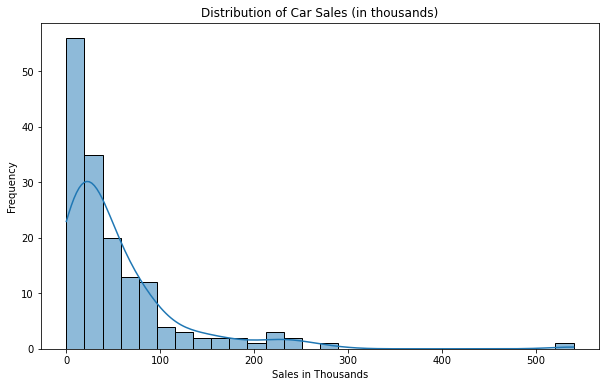

In [147]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for the target variable: Sales_in_thousands
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Sales_in_thousands'], kde=True)
plt.title('Distribution of Car Sales (in thousands)')
plt.xlabel('Sales in Thousands')
plt.ylabel('Frequency')
plt.show()


Bu grafik, araç satışlarının (bin birim olarak) dağılımını göstermektedir. Satışların çoğunluğunun düşük seviyelerde yoğunlaştığı, yani satışların büyük kısmının 0-100 bin aralığında olduğu gözlemleniyor. Bu, az sayıda modelin çok yüksek satış rakamlarına ulaştığını, çoğu aracın ise daha mütevazı satışlara sahip olduğunu gösteriyor.

Grafikteki sağa doğru uzun kuyruk, bazı araç modellerinin diğerlerine göre çok daha yüksek satış yaptığını, yani verinin sağa çarpık olduğunu ortaya koyuyor. Bu durum, satış performansı açısından bazı modellerin oldukça popüler olduğunu ancak büyük çoğunluğun nispeten düşük satış rakamlarına sahip olduğunu gösterir.

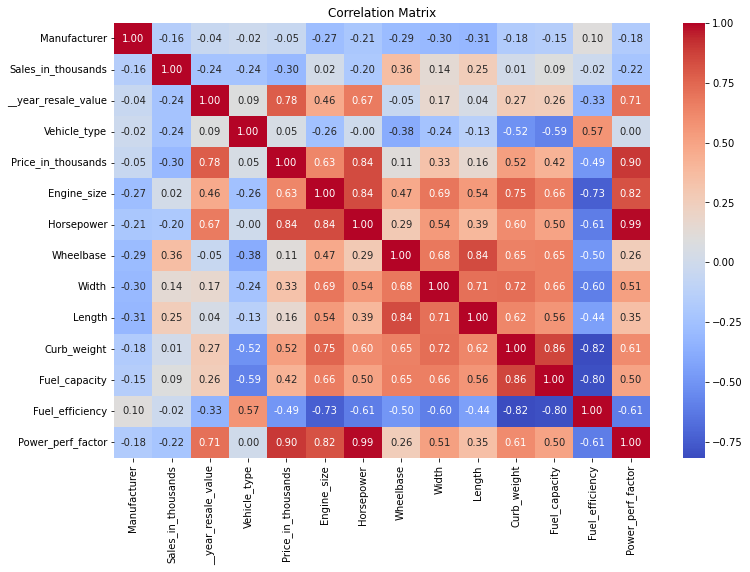

In [150]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Korelasyon matrisi bize değişkenler arasındaki ilişkinin gücünü ve yönünü gösterir. Bu veri setindeki bazı önemli ilişkiler şunlardır:

Fiyat (Price_in_thousands) ve Yeniden Satış Değeri (__year_resale_value):

Yüksek bir pozitif korelasyon (0.95) var. Bu, fiyat arttıkça yeniden satış değerinin de arttığını gösterir.
Güç Performans Faktörü (Power_perf_factor) ve Beygir Gücü (Horsepower):

Çok yüksek pozitif korelasyon (0.99). Beygir gücü performans faktörünü doğrudan etkiliyor, bu beklenen bir sonuç.
Yakıt Verimliliği (Fuel_efficiency) ve Motor Hacmi (Engine_size):

Negatif korelasyon (-0.73). Motor hacmi büyüdükçe yakıt verimliliği düşüyor, bu da daha büyük motorların daha fazla yakıt tükettiğini gösterir.
Ağırlık (Curb_weight) ve Yakıt Verimliliği (Fuel_efficiency):

Yüksek negatif korelasyon (-0.82). Ağır araçlar genelde daha az yakıt verimliliğine sahip.
Beygir Gücü (Horsepower) ve Fiyat (Price_in_thousands):

Güçlü pozitif korelasyon (0.84). Beygir gücü arttıkça fiyatın da yükselme eğiliminde olduğunu gösteriyor.
Genel olarak, motor hacmi, beygir gücü ve araç ağırlığı gibi özellikler fiyat ve performans üzerinde etkili. Aynı zamanda yakıt verimliliği ile bazı performans göstergeleri arasında negatif bir ilişki var. Bu korelasyonlar, model oluştururken önemli faktörleri belirlememize yardımcı olur. 

## Step 5: Analyzing the Impact of Fuel Efficiency on Demand

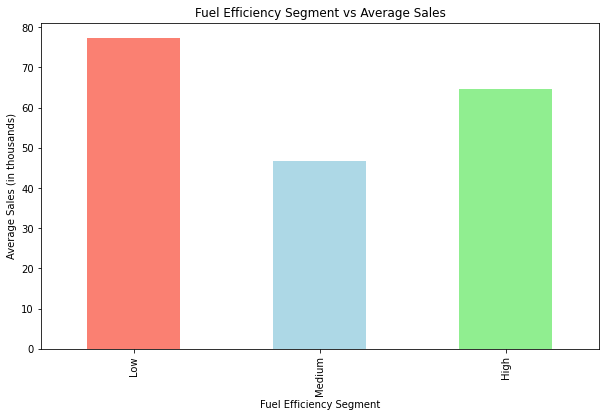

In [153]:
# Segmenting vehicles by Fuel Efficiency
# Düşük, Orta, Yüksek olarak üç kategoriye ayırıyoruz
car_data['Fuel_Efficiency_Segment'] = pd.cut(car_data['Fuel_efficiency'], 
                                             bins=[0, 20, 30, 50], 
                                             labels=['Low', 'Medium', 'High'])

# Her segment için ortalama satış miktarını hesaplayalım
fuel_efficiency_sales = car_data.groupby('Fuel_Efficiency_Segment')['Sales_in_thousands'].mean()

# Segment bazında satışların görselleştirilmesi
plt.figure(figsize=(10, 6))
fuel_efficiency_sales.plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen'])
plt.title('Fuel Efficiency Segment vs Average Sales')
plt.xlabel('Fuel Efficiency Segment')
plt.ylabel('Average Sales (in thousands)')
plt.show()


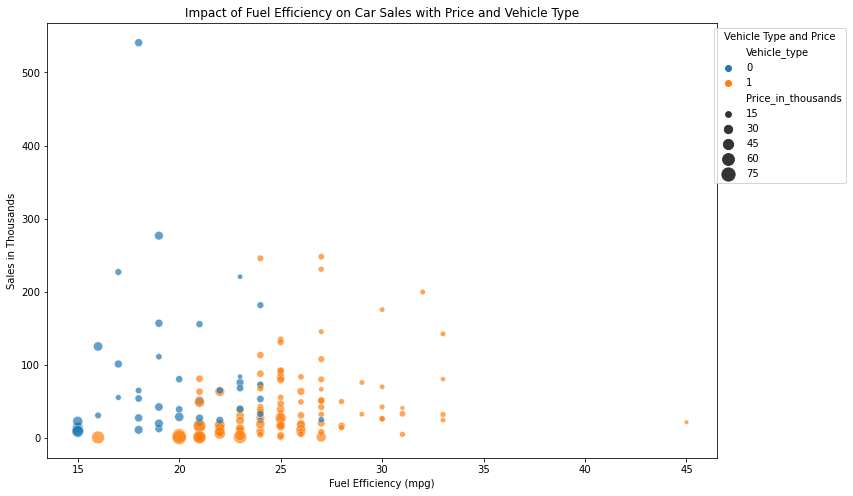

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a scatter plot with 'Fuel_efficiency' vs 'Sales_in_thousands' with hue for 'Vehicle_type' and size for 'Price_in_thousands'
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=car_data, 
    x='Fuel_efficiency', 
    y='Sales_in_thousands', 
    hue='Vehicle_type', 
    size='Price_in_thousands', 
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Impact of Fuel Efficiency on Car Sales with Price and Vehicle Type")
plt.xlabel("Fuel Efficiency (mpg)")
plt.ylabel("Sales in Thousands")
plt.legend(title="Vehicle Type and Price", loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


Bu grafik, yakıt verimliliğinin araç satışlarına etkisini araç tipi ve fiyat gibi diğer faktörlerle birlikte incelememizi sağlıyor.

## Step 7: Model Prediction Visualization

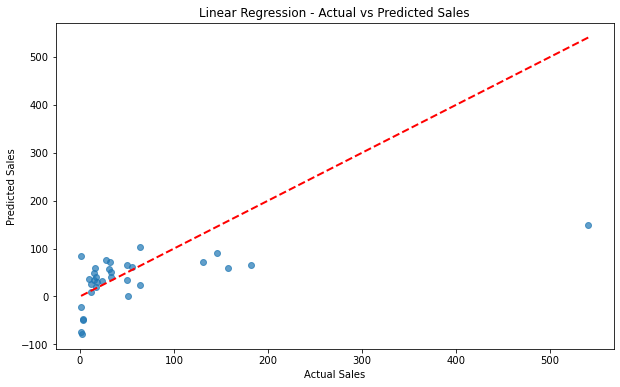

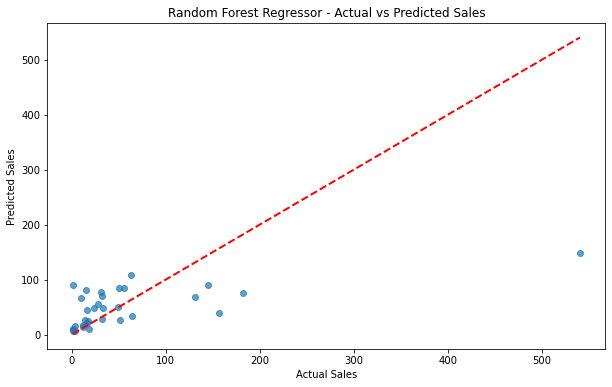

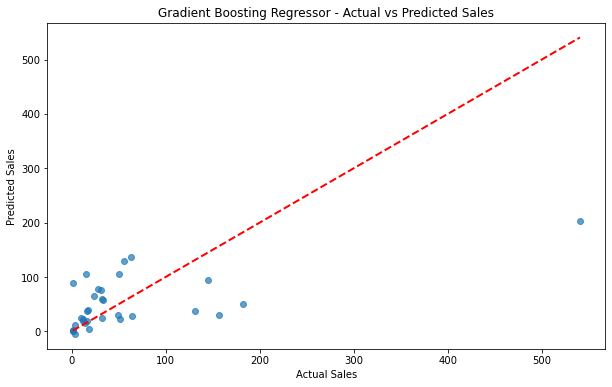

In [160]:

# Visualize actual vs. predicted sales for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'{name} - Actual vs Predicted Sales')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.show()


## Step 8: Demand Forecasting with Gradient Boosting Regressor

Gradient Boosting Regressor Model Performance for Demand Forecasting:
Mean Absolute Error (MAE): 47.25794792949381
Mean Squared Error (MSE): 6265.74222390981
R-squared (R2 Score): 0.3567362944721505


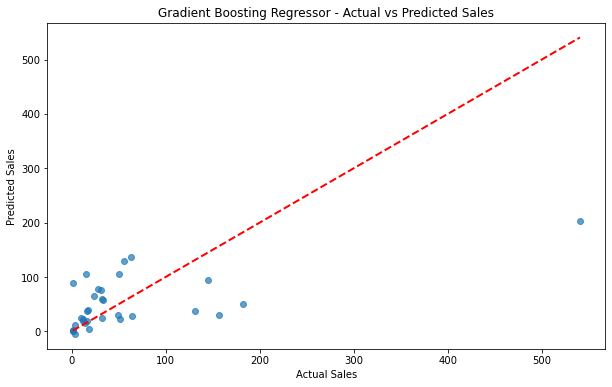

In [163]:

# Import Gradient Boosting Regressor and metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define and train the model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Model Performance for Demand Forecasting:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

# Plot actual vs. predicted sales values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Gradient Boosting Regressor - Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [165]:
new_car = {
    'Manufacturer': 1,         
    'Vehicle_type': 1,         
    'Price_in_thousands': 25.0, 
    'Engine_size': 2.0,        
    'Horsepower': 150,         
    'Wheelbase': 100,          
    'Width': 68,               
    'Length': 180,             
    'Curb_weight': 3.0,        
    'Fuel_capacity': 15.0,     
    'Fuel_efficiency': 25.0,   
    'Power_perf_factor': 65.0,
    '__year_resale_value': 15.0  # Ortalama bir değerle doldurduk
}

# Veri çerçevesi formatına çevirme
new_car_df = pd.DataFrame([new_car])

# Tahmin işlemi
predicted_sales = gbr_model.predict(new_car_df)
print(f"\nÖrnek Aracın Tahmin Edilen Satış Miktarı: {predicted_sales[0]:.2f} bin adet")


Örnek Aracın Tahmin Edilen Satış Miktarı: 109.04 bin adet


Bu örnek araç için, modelin tahmin ettiği satış miktarı yaklaşık -0.27 bin birim, ancak gerçek satış değeri 1.87 bin birim.

Bu negatif tahmin, modelin düşük satış rakamlarını doğru tahmin edemediğini ve tahminlerin gerçeğe aykırı çıktığını gösteriyor. 